In [1]:
import geopandas as gpd
import pandas as pd
import geobr
import matplotlib.pyplot as plt
import numpy as np
from shapely.wkt import loads as load_wkt
from shapely.geometry import Point
import matplotlib.lines as mlines

In [2]:
#Leitura dos dados utilizados
df_geobr = geobr.read_municipality(code_muni='all', year=2018)
df_estados = geobr.read_state(code_state='all', year=2018)

In [3]:
#Pegando apenas as colunas que correspondem ao código e o shape do município
colunas = ['code_muni', 'geometry']
df_geobr = df_geobr[colunas]
df_geobr

code_muni                                           geometry
0     1100015.0  MULTIPOLYGON (((-62.23224 -11.90804, -62.20670...
1     1100023.0  MULTIPOLYGON (((-63.57327 -9.78326, -63.57016 ...
2     1100031.0  MULTIPOLYGON (((-60.71834 -13.39058, -60.70904...
3     1100049.0  MULTIPOLYGON (((-61.27873 -11.50596, -61.28097...
4     1100056.0  MULTIPOLYGON (((-61.41347 -13.23417, -61.42603...
...         ...                                                ...
5567  5222005.0  POLYGON ((-48.53842 -16.75003, -48.54051 -16.7...
5568  5222054.0  POLYGON ((-50.00189 -17.78179, -50.01420 -17.7...
5569  5222203.0  POLYGON ((-47.07742 -15.06330, -47.07851 -15.0...
5570  5222302.0  POLYGON ((-48.91463 -15.20939, -48.91532 -15.1...
5571  5300108.0  MULTIPOLYGON (((-47.81455 -16.04995, -48.27781...

[5572 rows x 2 columns]

In [4]:
#Retirando valores nulos
df_geobr = df_geobr.dropna()
df_geobr

code_muni                                           geometry
0     1100015.0  MULTIPOLYGON (((-62.23224 -11.90804, -62.20670...
1     1100023.0  MULTIPOLYGON (((-63.57327 -9.78326, -63.57016 ...
2     1100031.0  MULTIPOLYGON (((-60.71834 -13.39058, -60.70904...
3     1100049.0  MULTIPOLYGON (((-61.27873 -11.50596, -61.28097...
4     1100056.0  MULTIPOLYGON (((-61.41347 -13.23417, -61.42603...
...         ...                                                ...
5567  5222005.0  POLYGON ((-48.53842 -16.75003, -48.54051 -16.7...
5568  5222054.0  POLYGON ((-50.00189 -17.78179, -50.01420 -17.7...
5569  5222203.0  POLYGON ((-47.07742 -15.06330, -47.07851 -15.0...
5570  5222302.0  POLYGON ((-48.91463 -15.20939, -48.91532 -15.1...
5571  5300108.0  MULTIPOLYGON (((-47.81455 -16.04995, -48.27781...

[5572 rows x 2 columns]

In [5]:
centroides = []
for linha in df_geobr.itertuples():
    poligono = load_wkt(str(linha.geometry))
    centroides.append(poligono.centroid)

In [6]:
df_centroides = pd.DataFrame()
df_centroides['geometry'] = centroides
df_centroides = gpd.GeoDataFrame(df_centroides)
df_centroides.crs = df_geobr.crs

In [7]:
centroides_estado = []
for linha in df_estados.itertuples():
    poligono = load_wkt(str(linha.geometry))
    centroides_estado.append(poligono.centroid)
    
coordenadas_estado = []
for point in centroides_estado:
    coordenadas_estado.append((point.x, point.y))
    
df_estados['centroides'] = coordenadas_estado

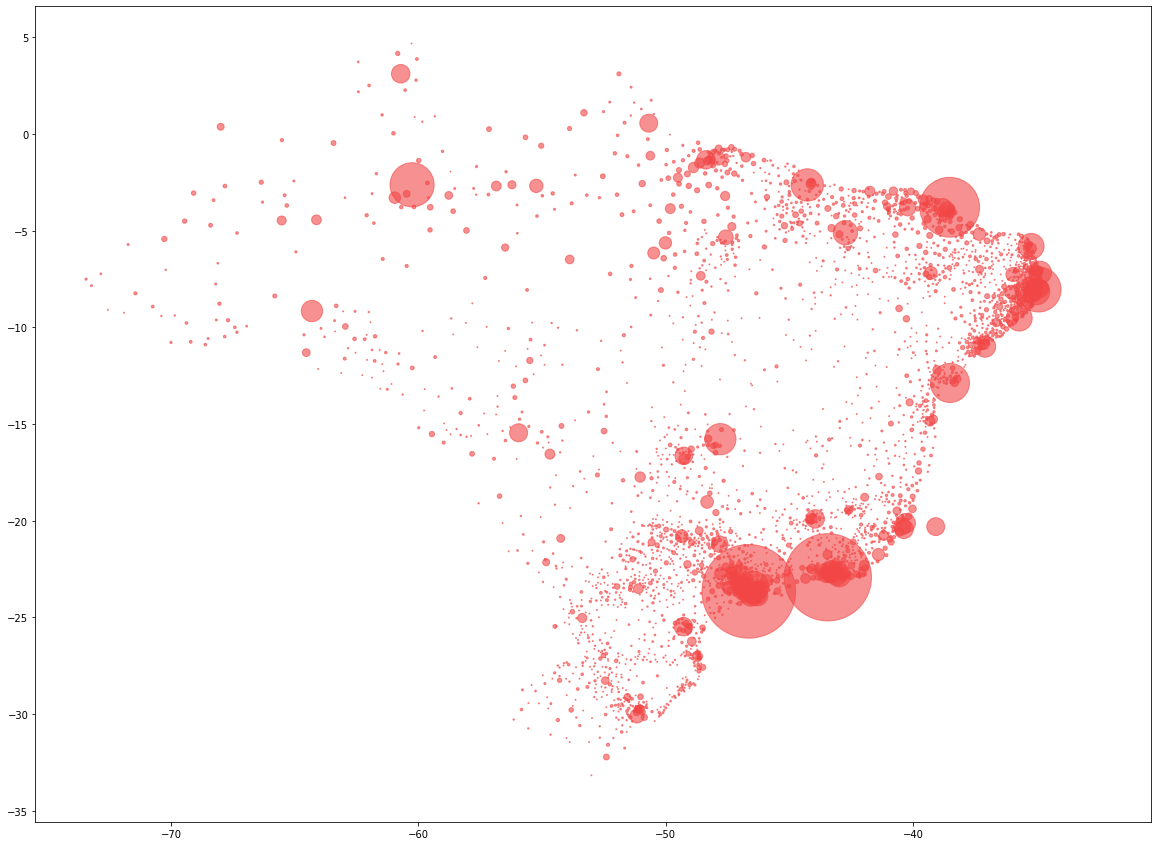

In [8]:
arquivo = "casos_semana_29.csv"
df_casos = pd.read_csv(arquivo)
copy_geobr = df_geobr.copy()
copy_geobr = pd.merge(copy_geobr, df_casos, on='code_muni', how='left')
copy_geobr.fillna(0, inplace=True)

markersize = []
for linha in copy_geobr.itertuples():
    markersize.append(linha.mortes)

fig, ax = plt.subplots(figsize=(20, 15))

xs=[point.x for point in df_centroides['geometry']]
ys=[point.y for point in df_centroides['geometry']]
scatter = ax.scatter(xs, ys, markersize, alpha=0.6, color="#f24646")

del df_casos

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, color='#f24646', num=5)

/home/marchesotti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/home/marchesotti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


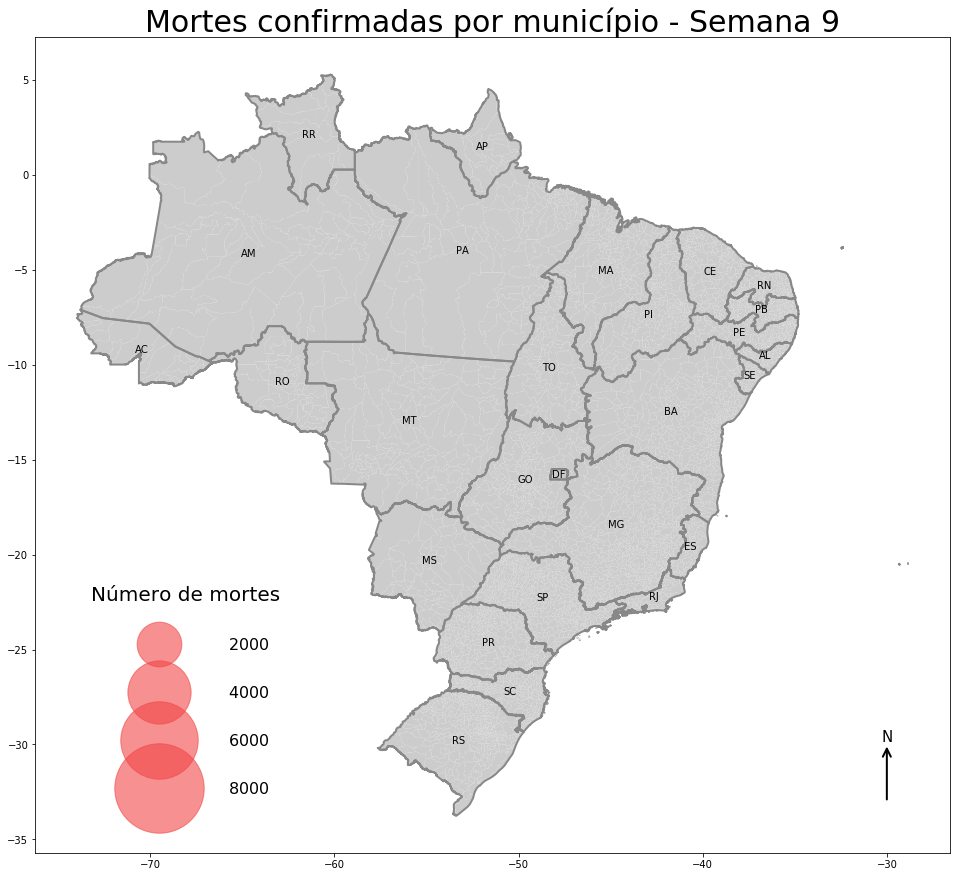

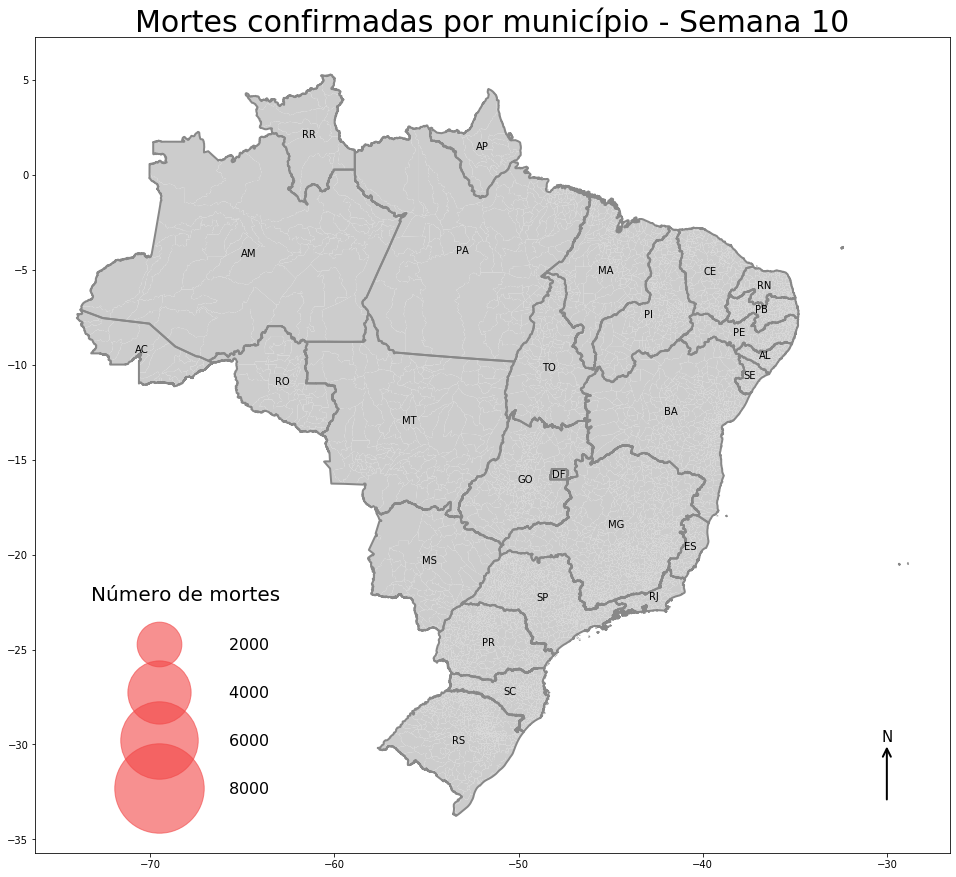

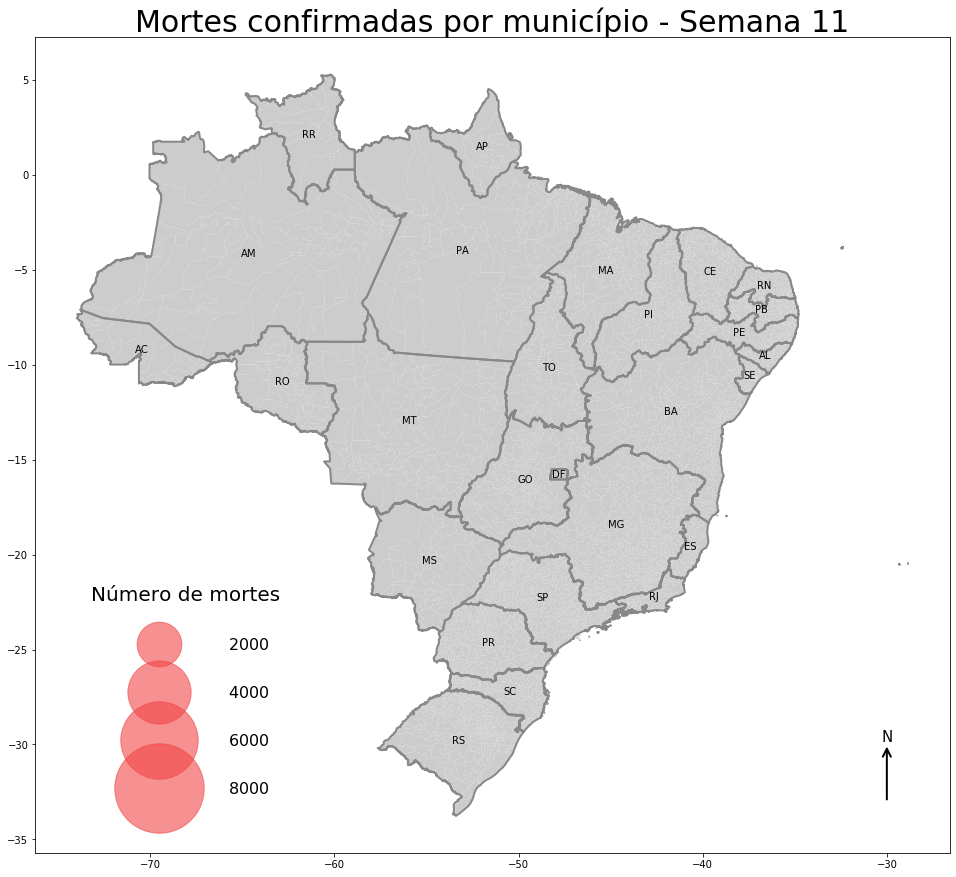

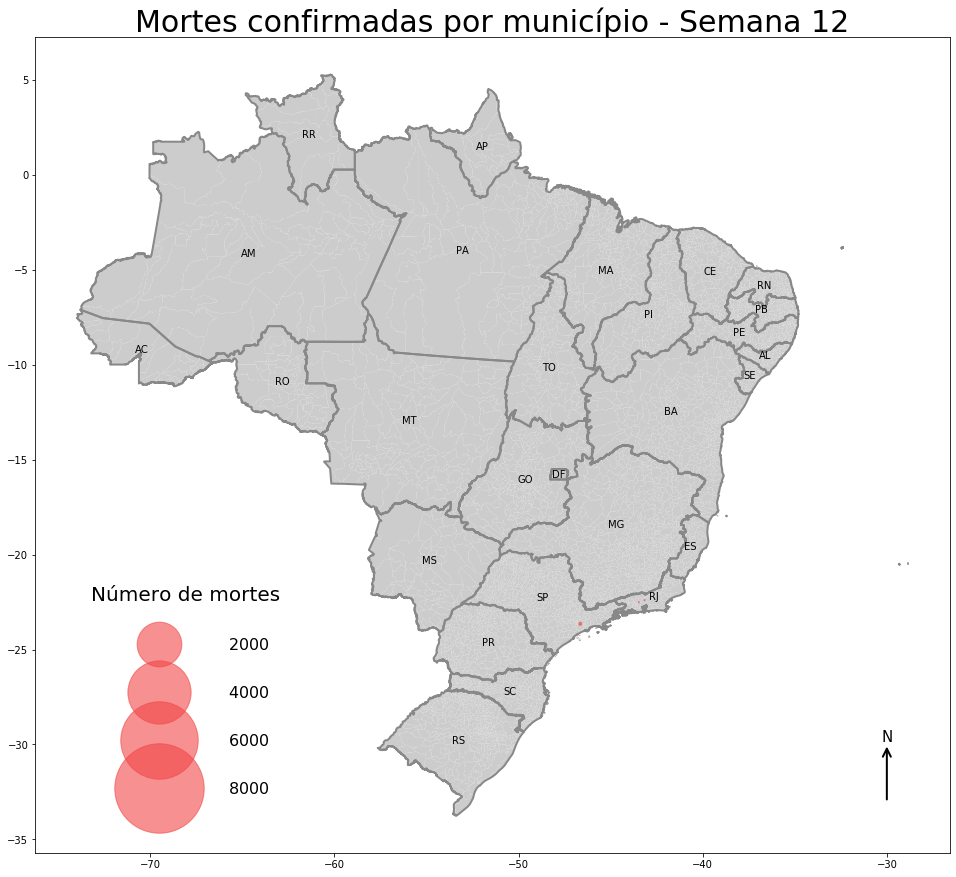

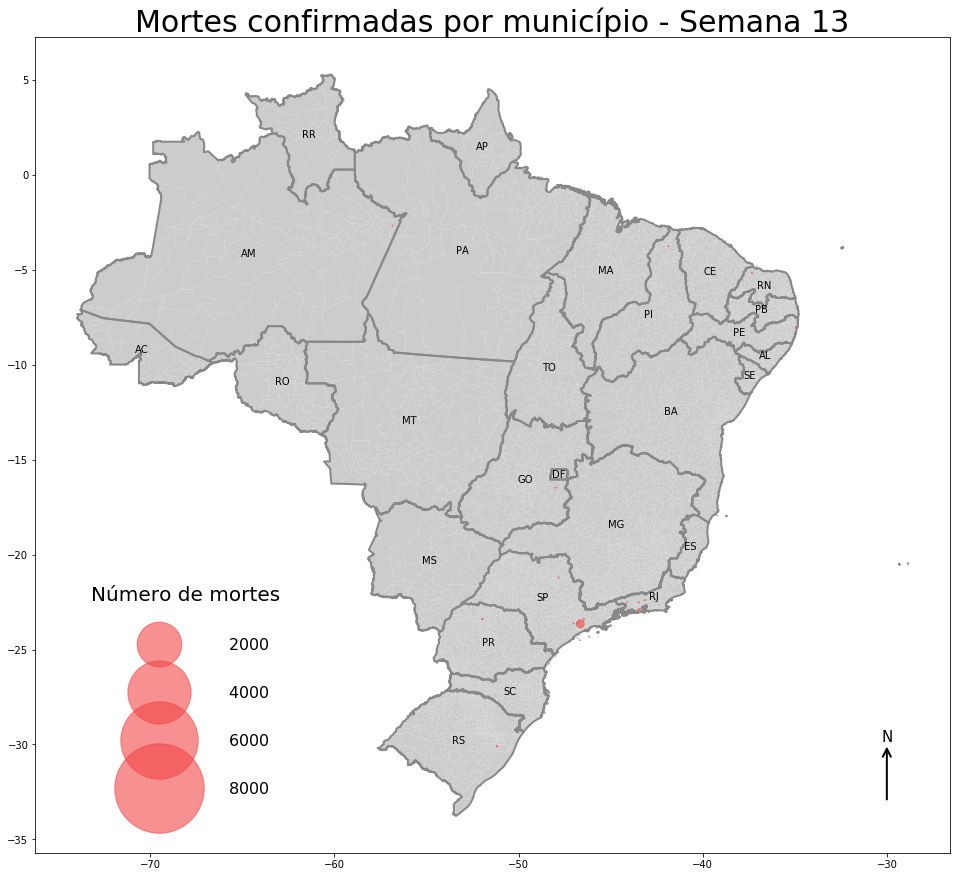

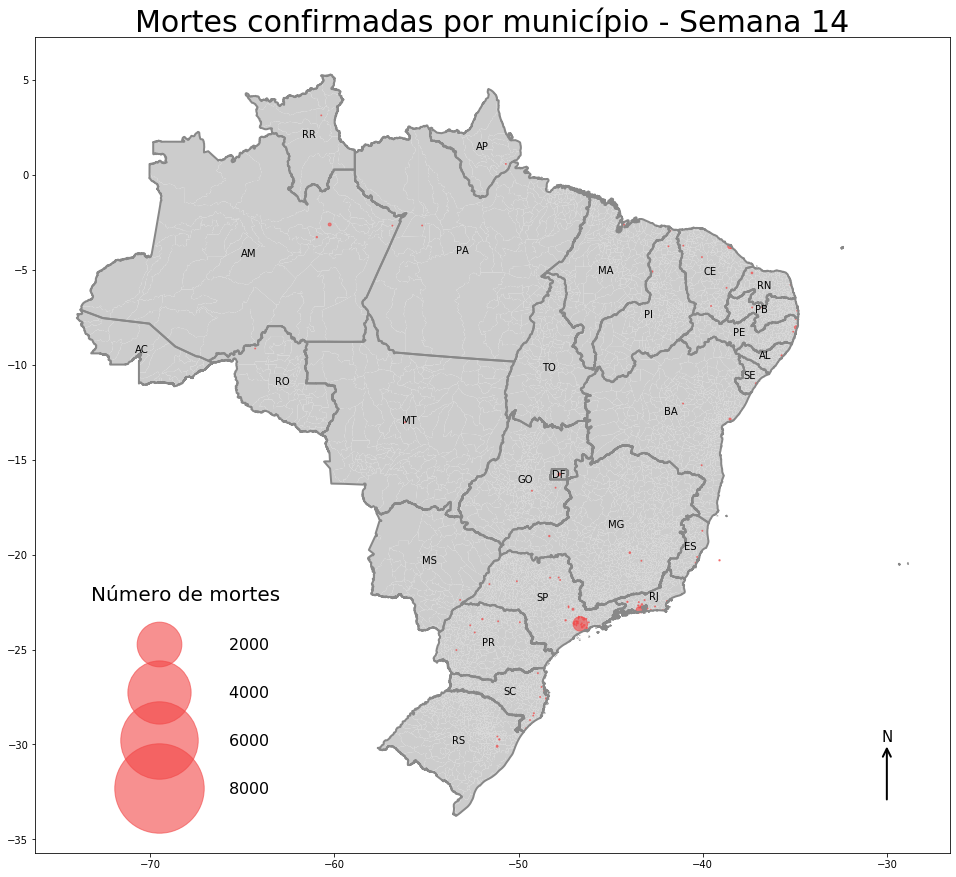

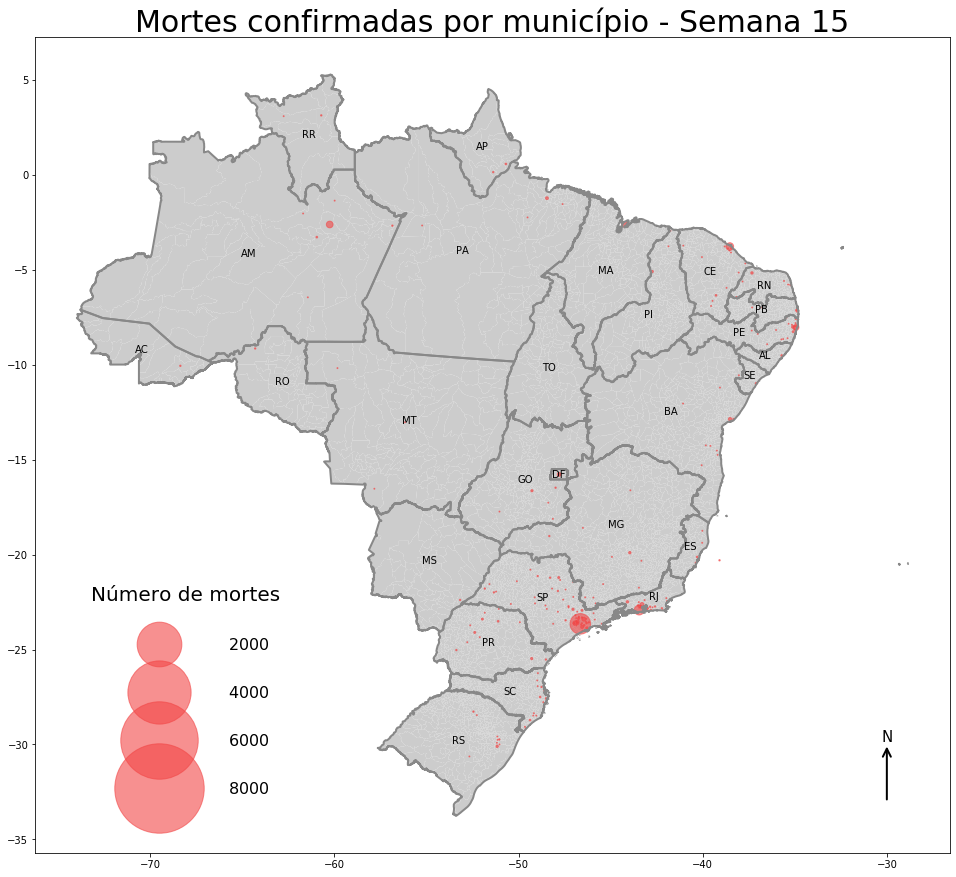

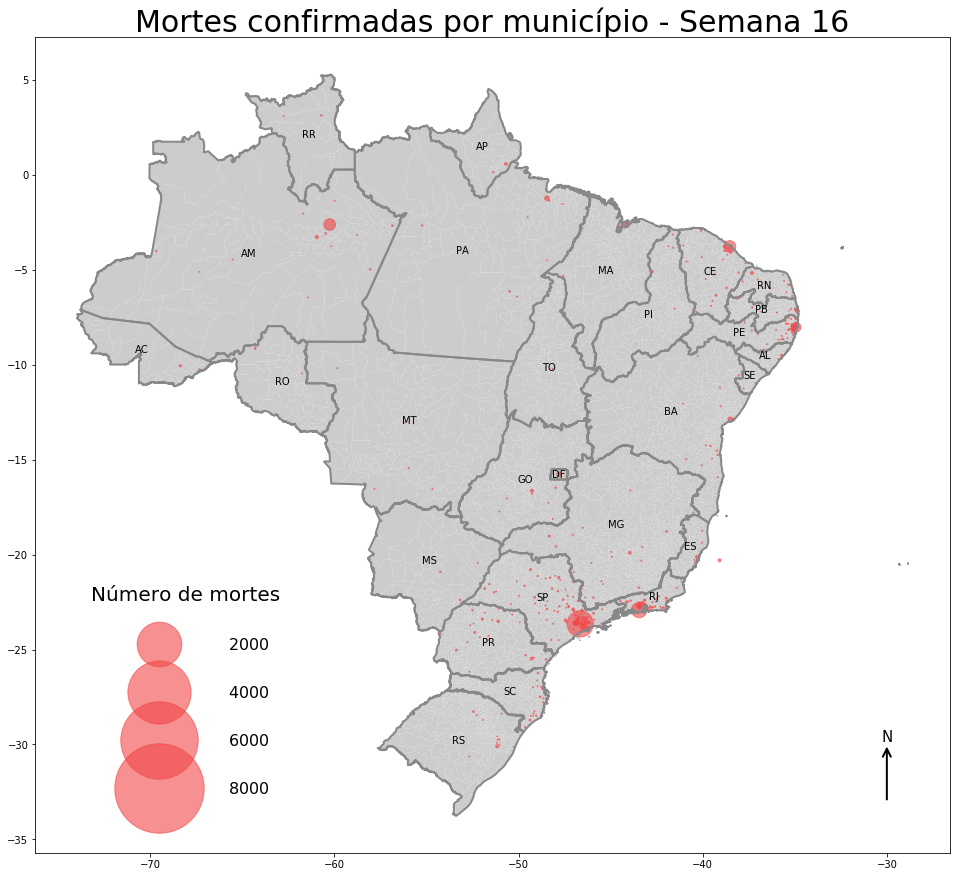

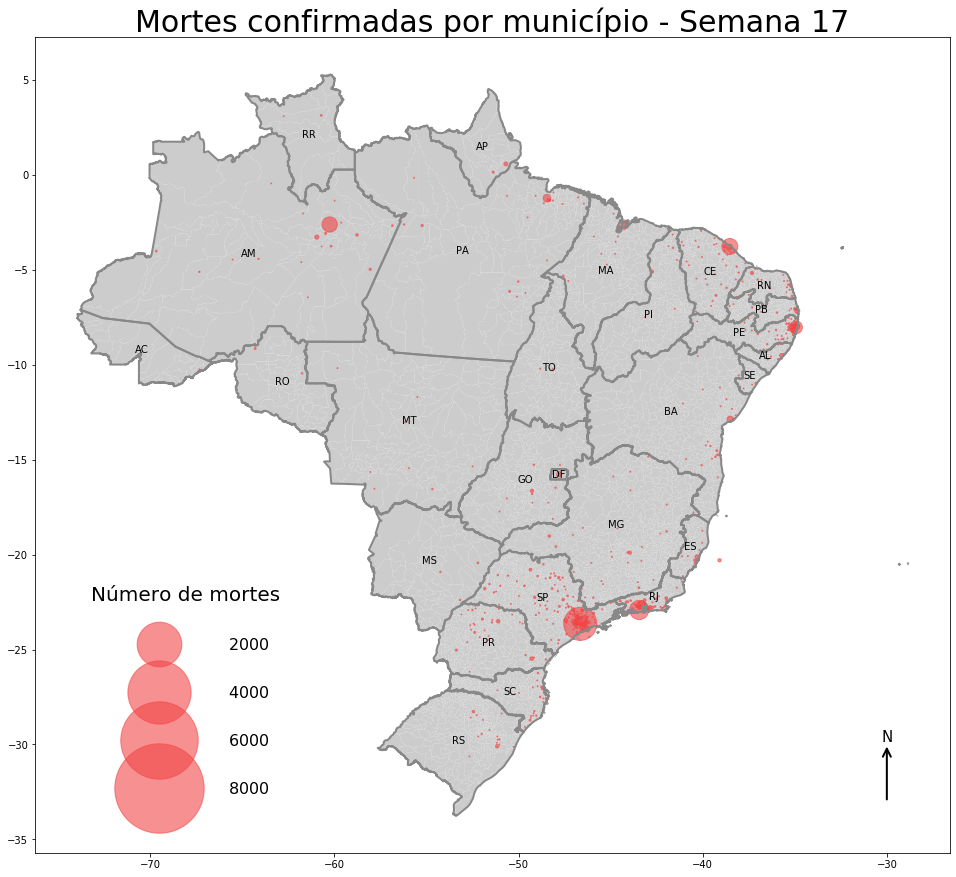

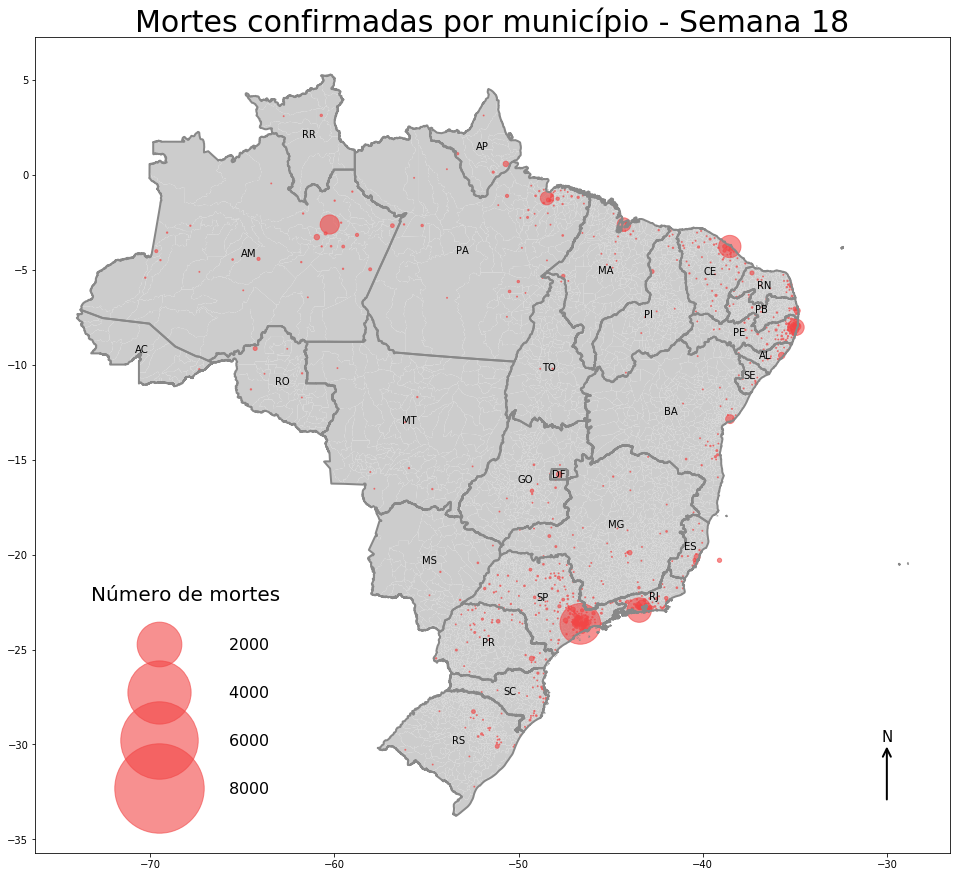

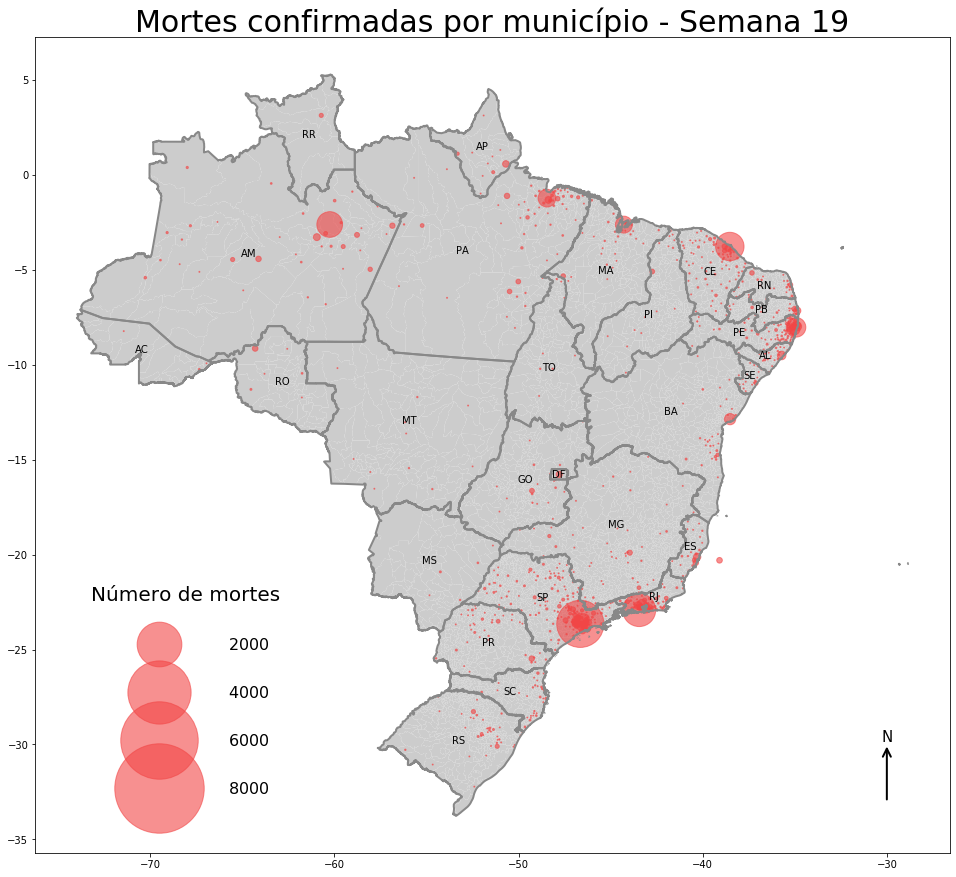

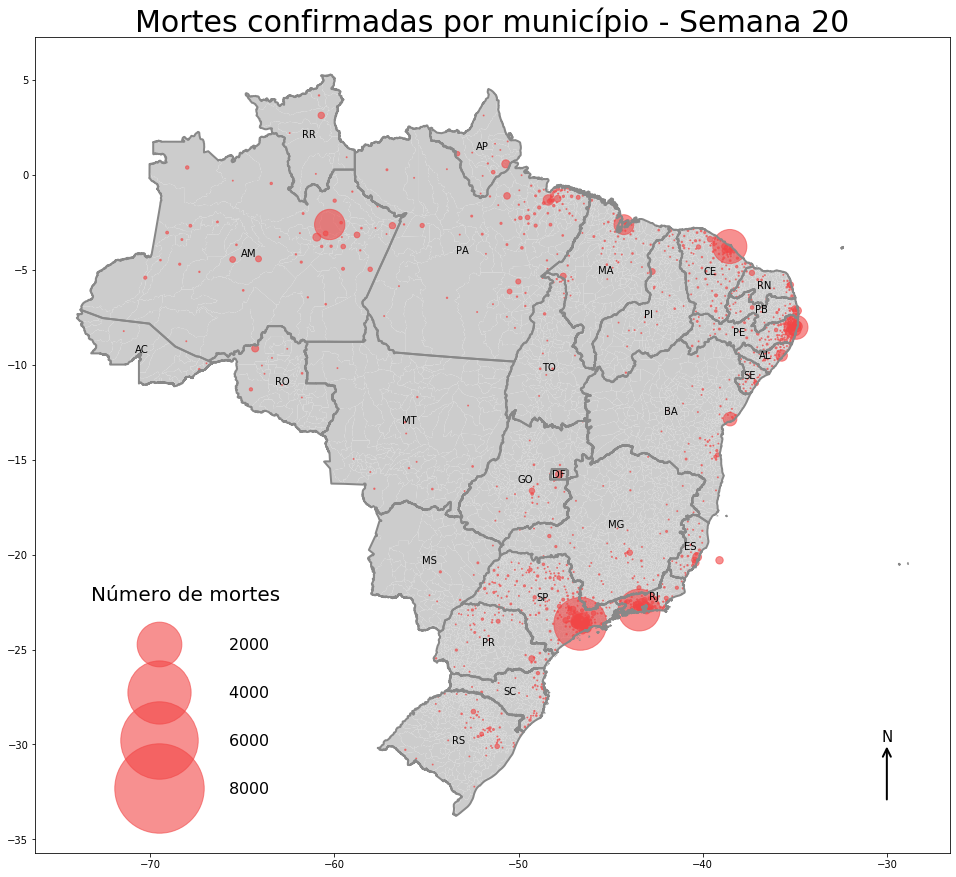

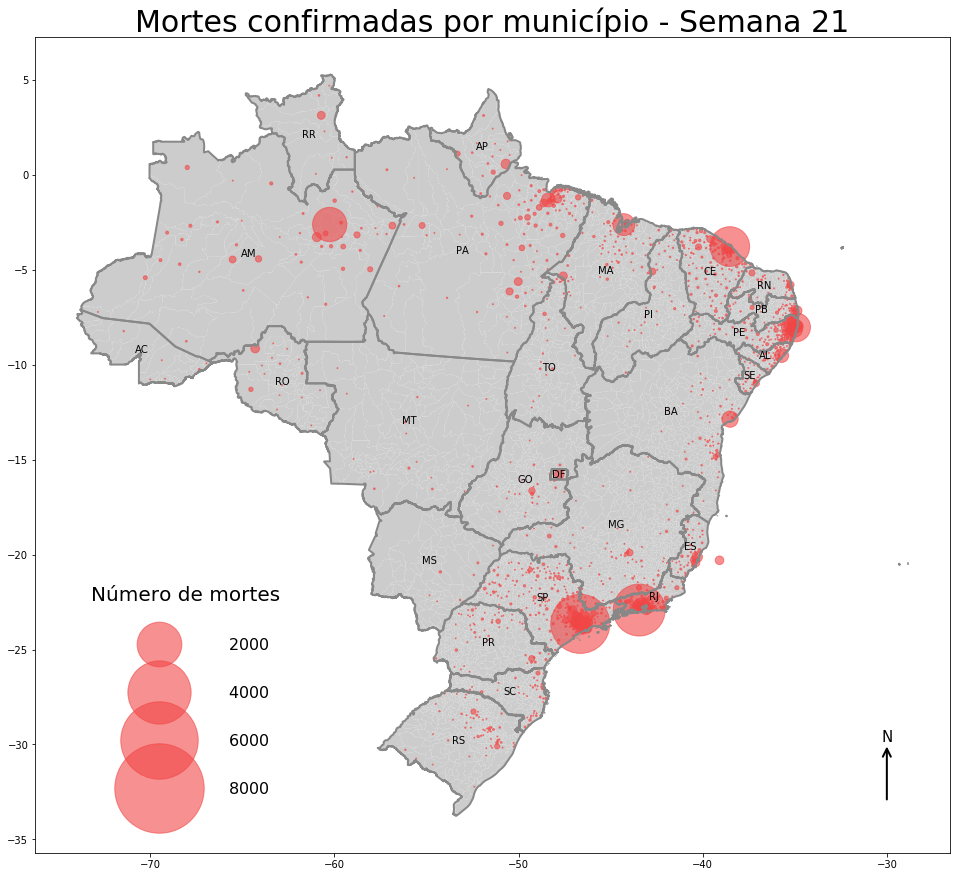

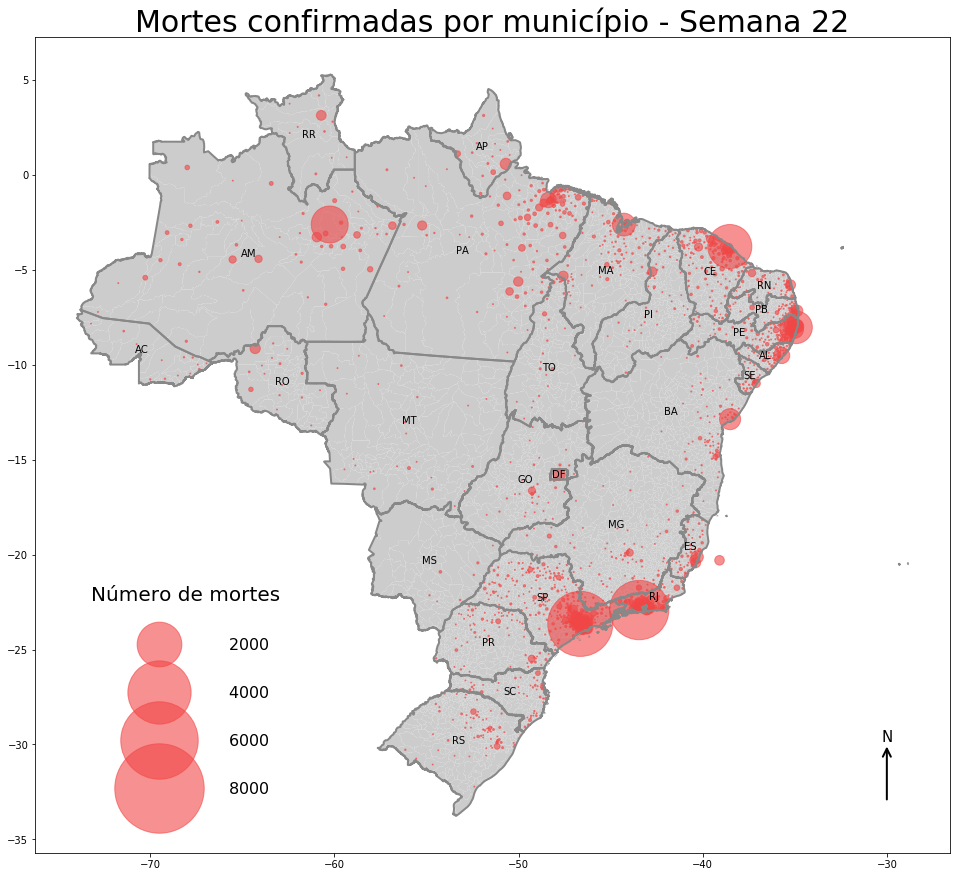

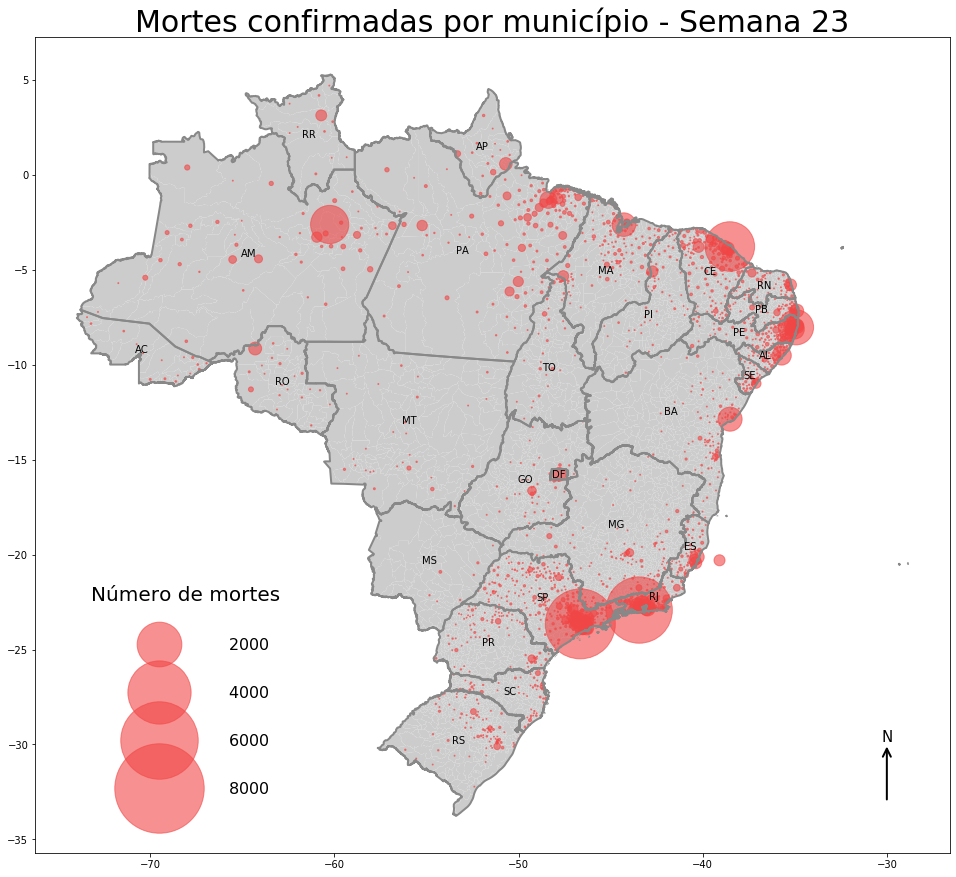

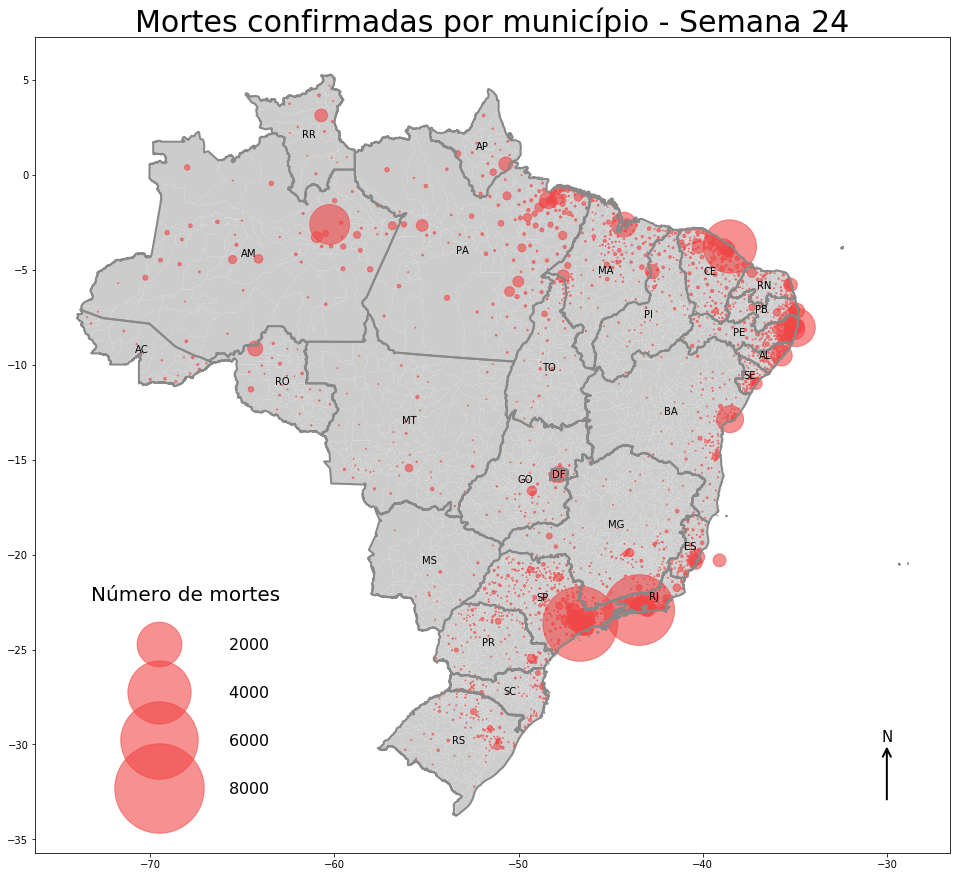

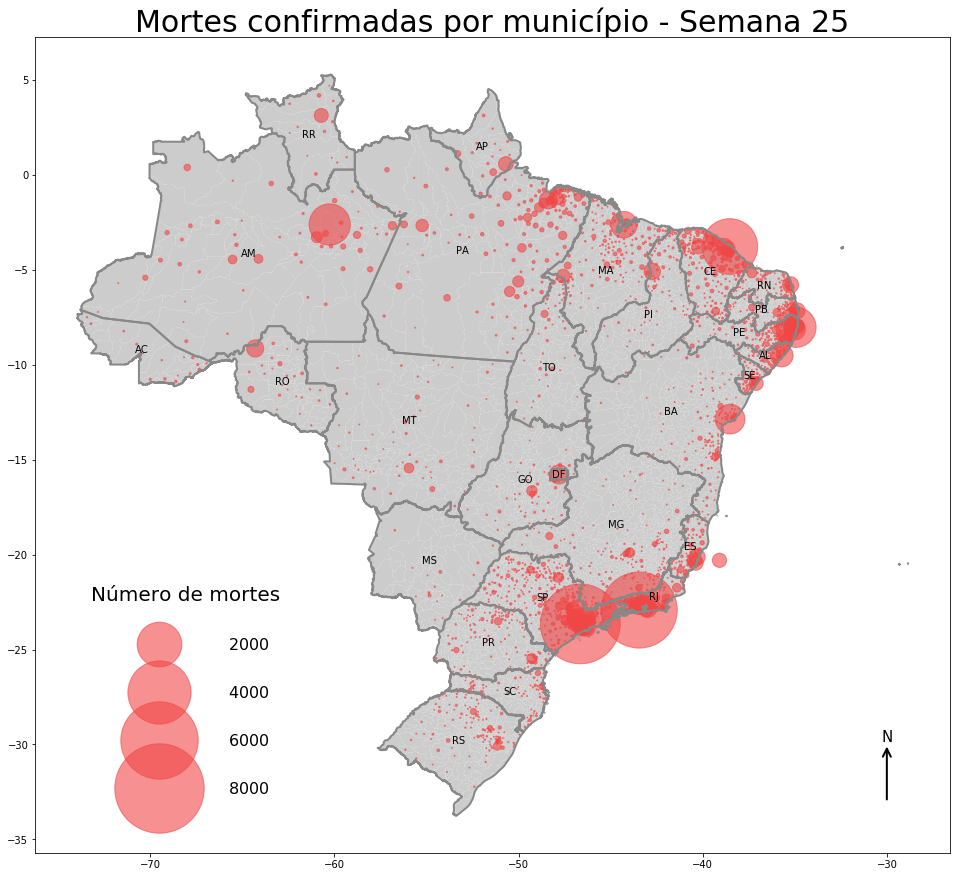

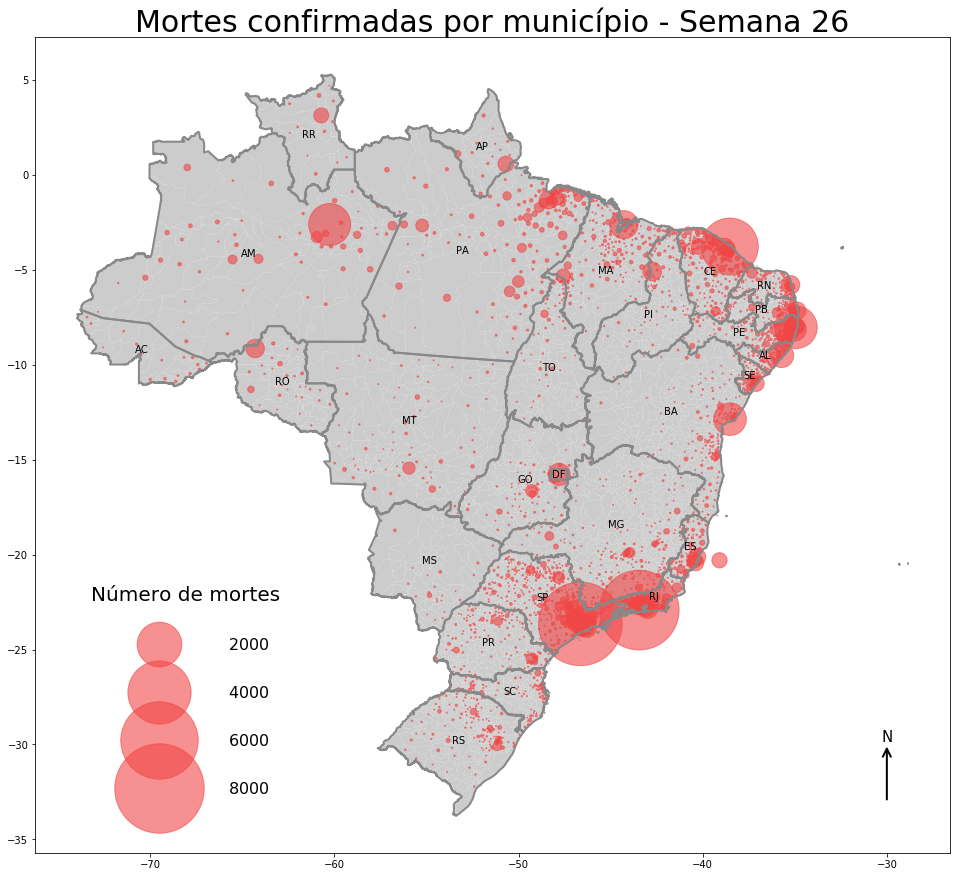

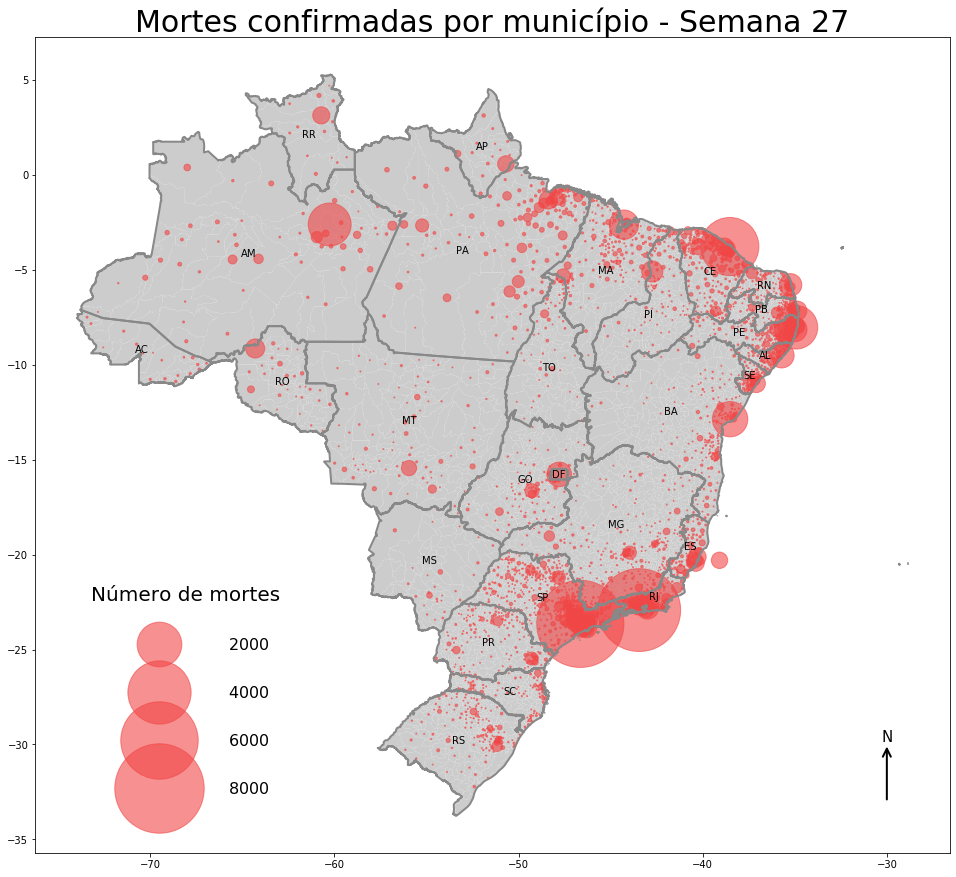

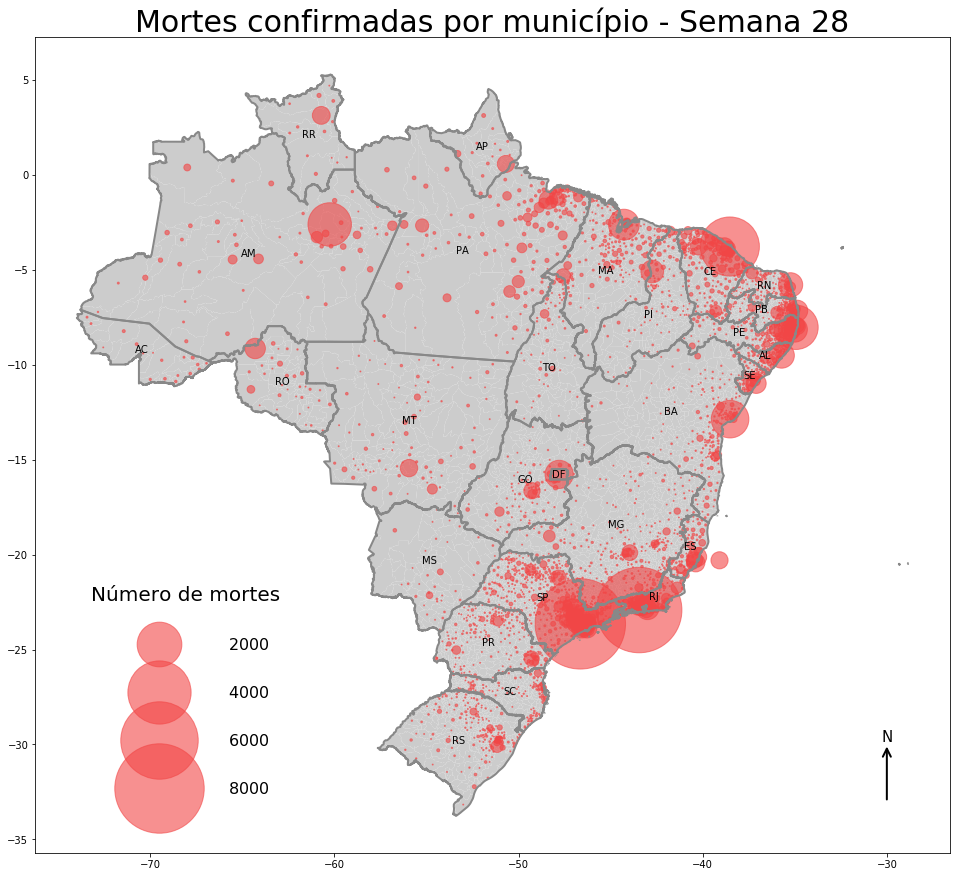

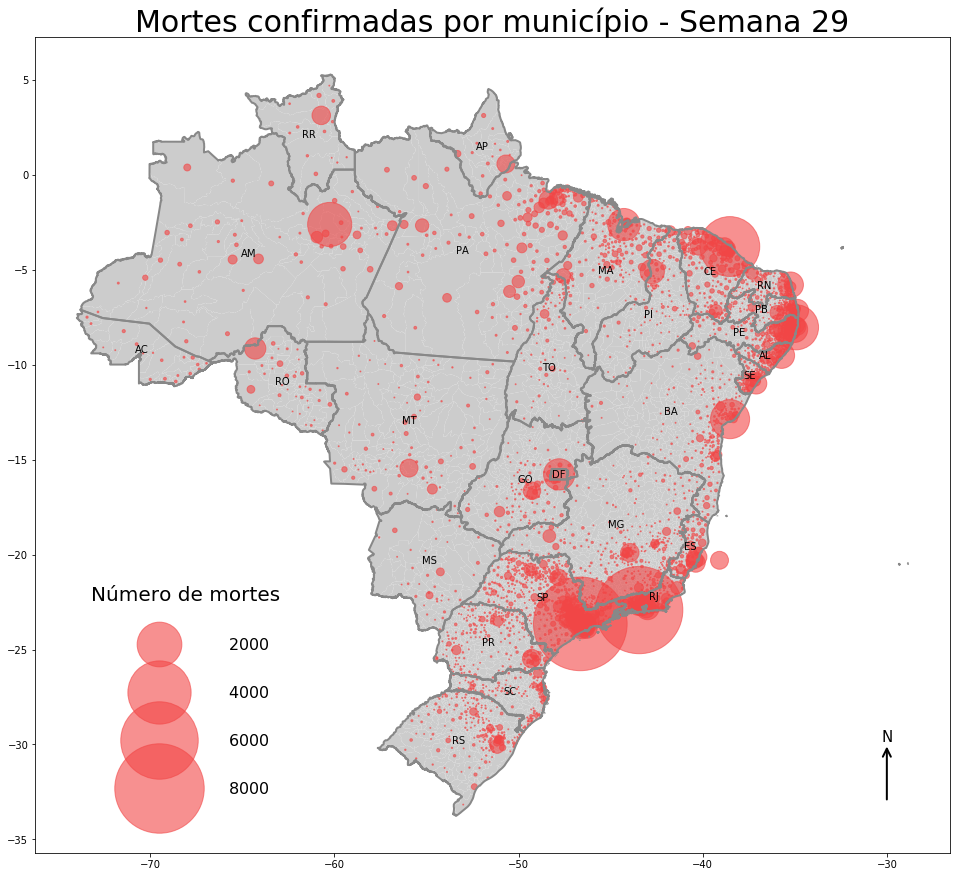

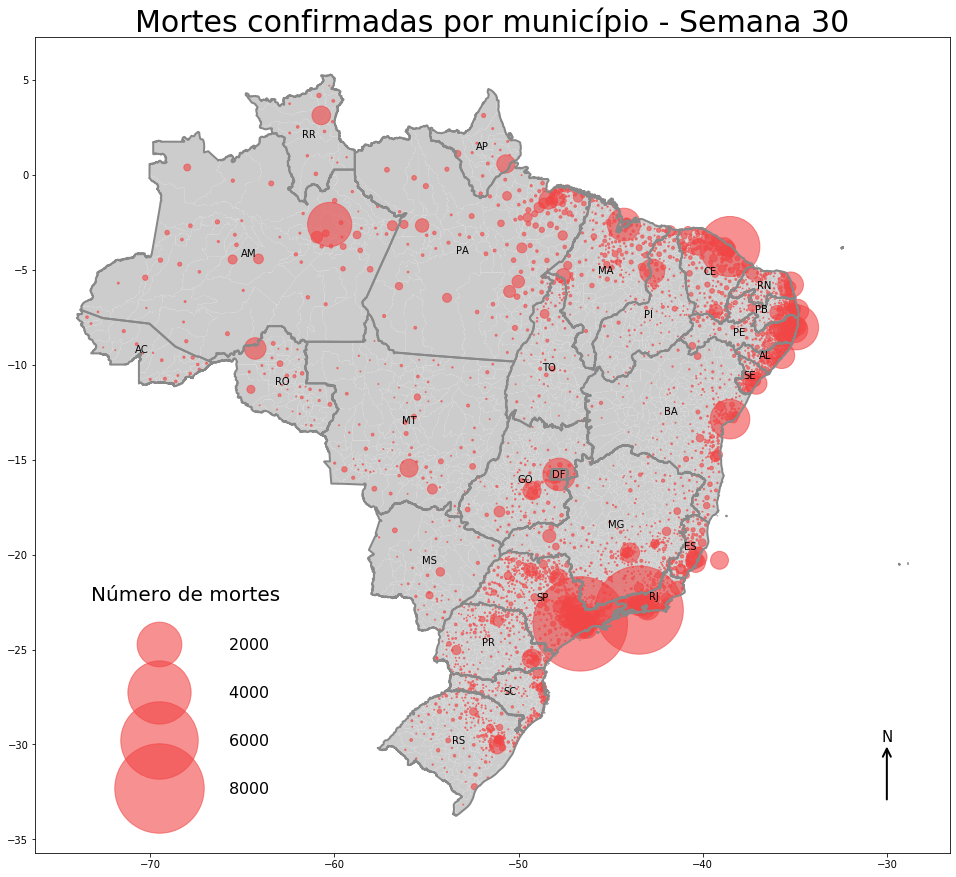

In [9]:
legend = '''ax.legend(handles, labels, title="Número de mortes", loc=3, borderpad=3, labelspacing=2, handlelength=7, title_fontsize=20, fontsize=16, frameon=False)'''
for semana in range(9,31):
    arquivo = "casos_semana_{}.csv".format(semana)
    df_casos = pd.read_csv(arquivo)
    copy_geobr = df_geobr.copy()
    copy_geobr = pd.merge(copy_geobr, df_casos, on='code_muni', how='left')
    copy_geobr.fillna(0, inplace=True)
    
    markersize = []
    for linha in copy_geobr.itertuples():
        markersize.append(linha.mortes)
        
    fig, ax = plt.subplots(figsize=(20, 15))
    copy_geobr.plot(ax=ax, facecolor='#cccccc')
    df_estados.geometry.boundary.plot(color=None,edgecolor='#888888',linewidth = 2,ax=ax)

    ax.scatter(xs, ys, markersize, alpha=0.6, color="#f24646")
    
    ax.annotate('', xy=(-30, -30), xytext=(-30, -33), arrowprops=dict(arrowstyle= '->', color='k', lw=2, mutation_scale=20))
    ax.text(-30, -30, "N", ha="center", va="bottom", size=15)
    
    for linha in df_estados.itertuples():
        plt.annotate(s=linha.abbrev_state, xy=linha.centroides, horizontalalignment='center', verticalalignment='center')


    exec(legend)
    plt.title("Mortes confirmadas por município - Semana {}".format(semana), fontsize=30)
    plt.savefig("mapa_mortes_{}.png".format(semana))
    del df_casos